<a href="https://colab.research.google.com/github/YuriEvan/ADALL_github/blob/main/LLM_5thJan26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [5]:
import pandas as pd
# Example: Replace this with the raw URL of your GitHub file
github_raw_url = 'https://raw.githubusercontent.com/YuriEvan/ADALL_github/main/laptop_prices_2024_sgd_TL.csv'
try:
  df = pd.read_csv(github_raw_url)
  print("Successfully loaded data from GitHub!")
  display(df.head())
except Exception as e:
  print(f"Error loading data: {e}")
  print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")


Successfully loaded data from GitHub!


,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


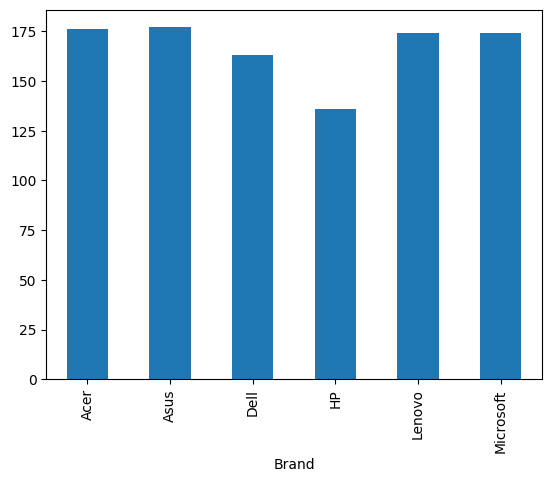

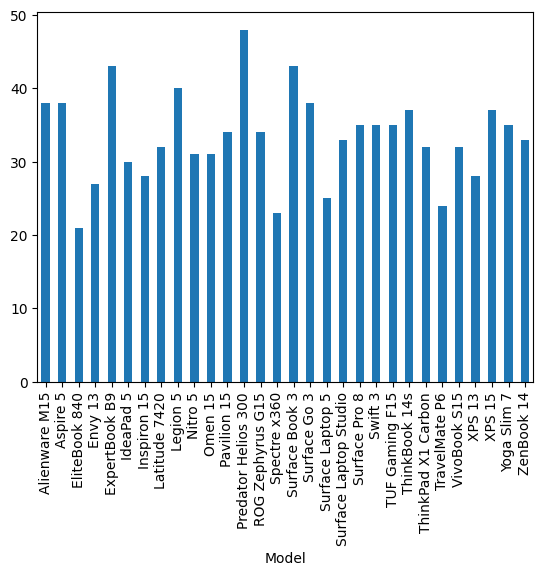

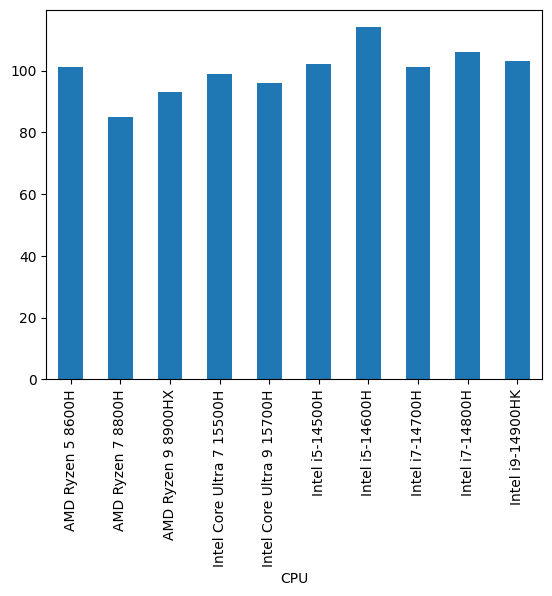

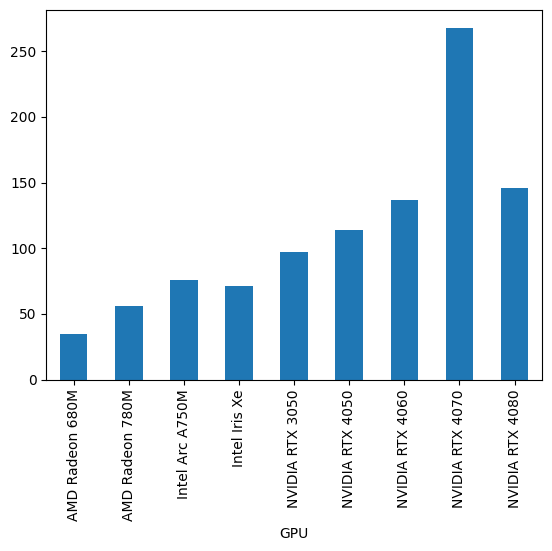

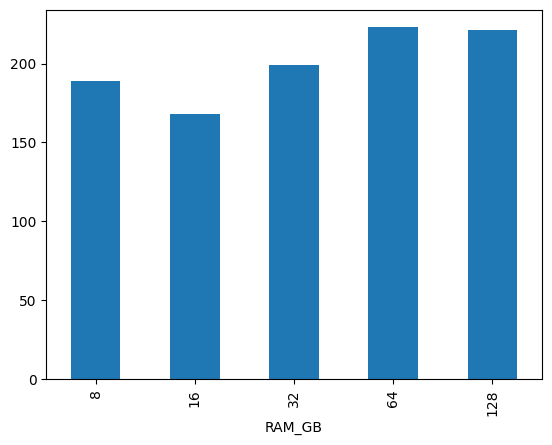

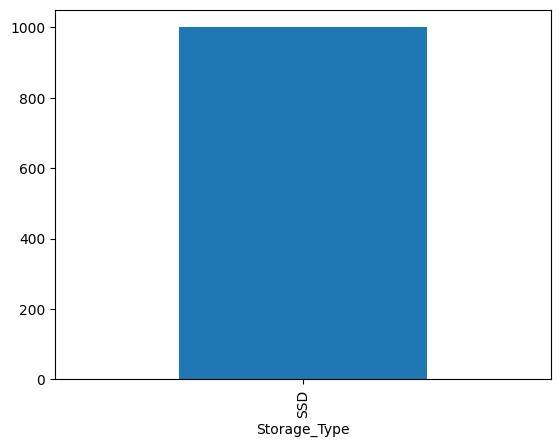

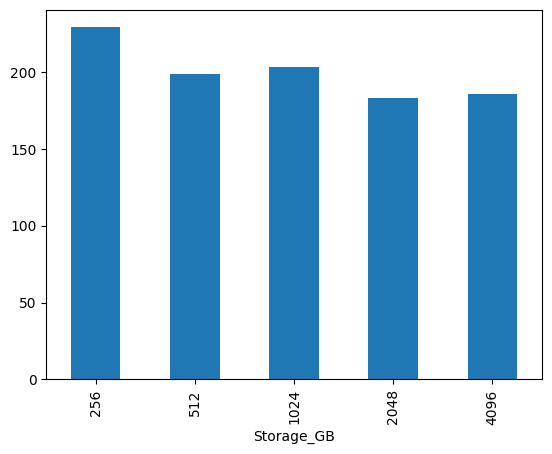

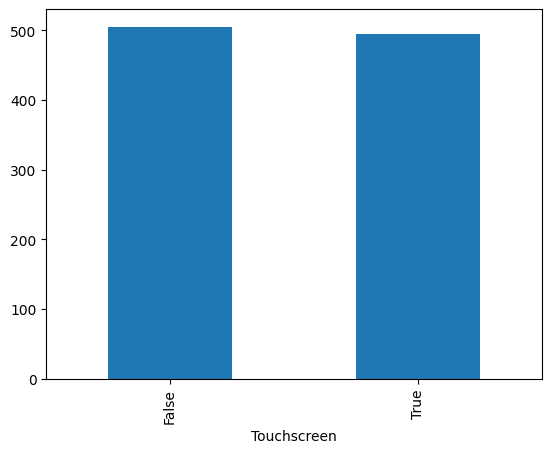

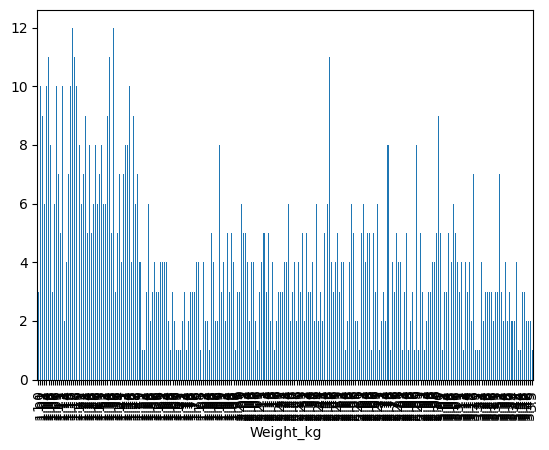

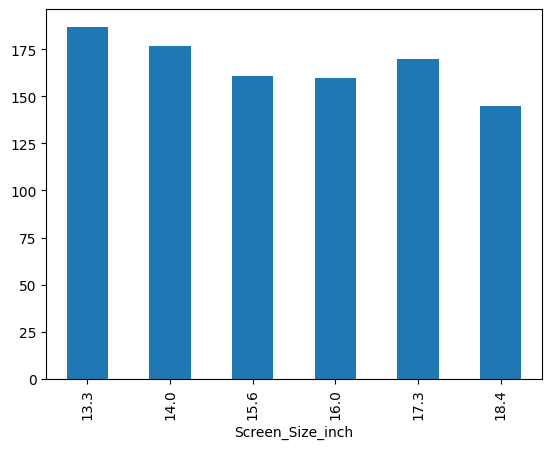

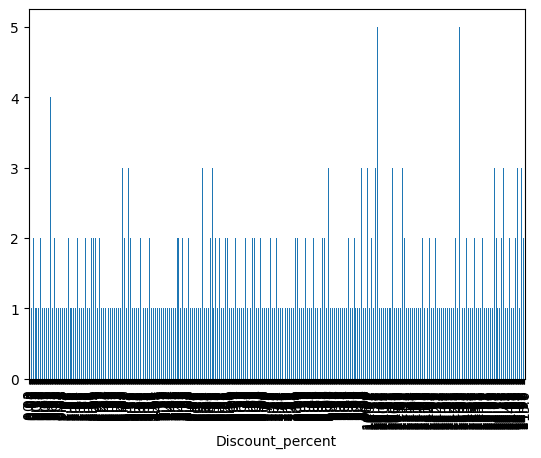

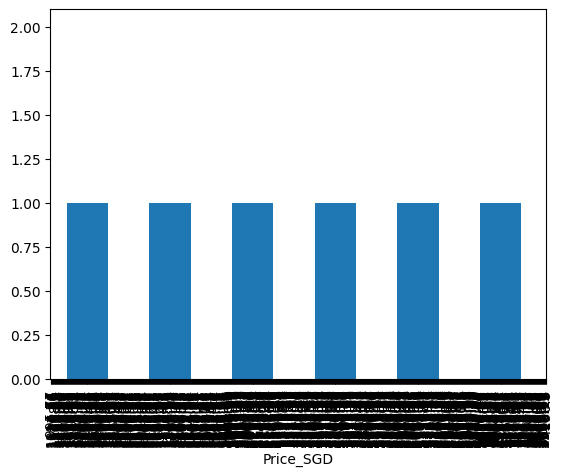

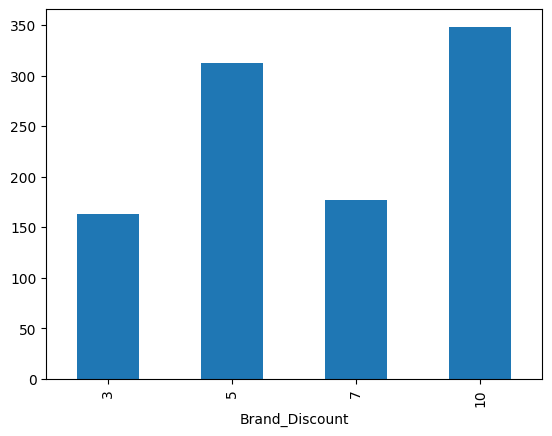

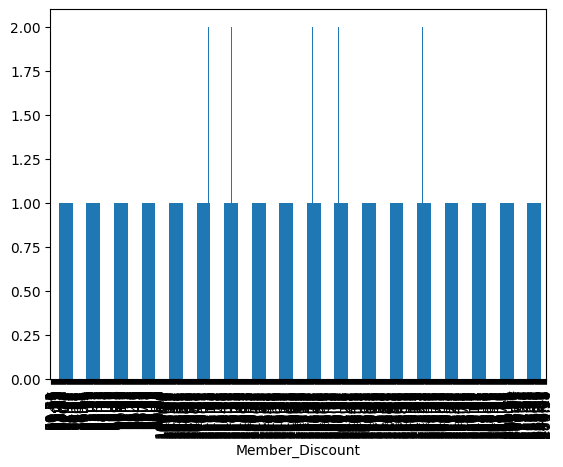

In [7]:
import matplotlib.pyplot as plt

# plot each df group
for column in df.columns:
    df.groupby(column).size().plot(kind='bar')
    plt.show()

# Task
Perform a comprehensive exploratory data analysis (EDA) on the `df` DataFrame, loaded from 'https://raw.githubusercontent.com/YuriEvan/ADALL_github/main/laptop_prices_2024_sgd_TL.csv'. The analysis should include: a dataset overview (rows, columns, types, first few rows, and potential target variables); a structural soundness check (data types, ID columns, uniqueness); an analysis of missing and suspicious values; a feature distribution analysis with appropriate visualizations; an assessment of potential data leakage and redundancy; and a summary of feature readiness for modeling, concluding with overall findings and recommendations for further steps in machine learning model development.

## Dataset Overview & Target Identification

### Subtask:
Provide a summary of the dataset including number of rows, columns, data types, and initial inspection of the first few rows to understand what a single row represents. Based on the column names, propose potential target variables and their types.


**Reasoning**:
To provide a comprehensive overview of the dataset, I will start by displaying the number of rows and columns, a concise summary including data types and non-null values, and the first 5 rows of the DataFrame.



In [8]:
print(f"DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.\n")
df.info()
print("\nFirst 5 rows of the DataFrame:")
display(df.head())

DataFrame has 1000 rows and 14 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Model             1000 non-null   object 
 2   CPU               1000 non-null   object 
 3   GPU               1000 non-null   object 
 4   RAM_GB            1000 non-null   int64  
 5   Storage_Type      1000 non-null   object 
 6   Storage_GB        1000 non-null   int64  
 7   Touchscreen       1000 non-null   bool   
 8   Weight_kg         1000 non-null   float64
 9   Screen_Size_inch  1000 non-null   float64
 10  Discount_percent  1000 non-null   float64
 11  Price_SGD         1000 non-null   float64
 12  Brand_Discount    1000 non-null   int64  
 13  Member_Discount   1000 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 102.7+ KB

First 5 rows of the DataFra

,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


#### Potential Target Variables and Their Types

Based on the column names and their descriptions, the most suitable target variable for predicting laptop prices is:

*   **`Price_SGD`**: This is a numerical (float64) variable representing the price of the laptop in Singapore Dollars. This is a continuous variable, making it suitable for regression tasks.

Other potential target variables, depending on the specific analytical goal, could include:

*   **`Discount_percent`**: Numerical (float64), if the goal is to predict the discount percentage.
*   **`Member_Discount`**: Numerical (float64), if the goal is to predict the member discount amount.

## Structural Soundness Check

### Subtask:
Examine column data types, identify any obvious ID columns, and check if data types align with real-world meaning. This also includes checking for unique identifiers.


**Reasoning**:
To understand the cardinality of categorical features and identify potential identifier columns, I will iterate through the object-type columns, display their data type, and count their unique values.



In [10]:
object_columns = df.select_dtypes(include='object').columns

print("Reviewing object-type columns for data types, cardinality, and potential unique identifiers:\n")

for col in object_columns:
    unique_count = df[col].nunique()
    print(f"Column: '{col}'")
    print(f"  Data Type: {df[col].dtype}")
    print(f"  Number of Unique Values: {unique_count}")
    if unique_count == df.shape[0]:
        print(f"  -> This column has a unique value for each row, indicating it might be a unique identifier.")
    print("\n")

Reviewing object-type columns for data types, cardinality, and potential unique identifiers:

Column: 'Brand'
  Data Type: object
  Number of Unique Values: 6


Column: 'Model'
  Data Type: object
  Number of Unique Values: 30


Column: 'CPU'
  Data Type: object
  Number of Unique Values: 10


Column: 'GPU'
  Data Type: object
  Number of Unique Values: 9


Column: 'Storage_Type'
  Data Type: object
  Number of Unique Values: 1




### Summary of Object-Type Column Analysis

The review of object-type columns (`Brand`, `Model`, `CPU`, `GPU`, `Storage_Type`) shows that their data types are appropriate for categorical or textual data. The cardinality of these columns is relatively low, ranging from 1 (`Storage_Type`) to 30 (`Model`). None of these columns exhibit a number of unique values equal to the total number of rows (1000), indicating that **no obvious unique identifiers were found among the object-type features**.

`Storage_Type` having only 1 unique value suggests it might be a constant column, which could be considered for removal during feature engineering if it doesn't provide any predictive power.

### Numerical Column Review

Next, we will review the numerical columns to check their data types, identify potential issues such as unexpected ranges, and confirm if any of them might be acting as implicit identifiers. We will look at both integer and float types.

**Reasoning**:
To perform a structural soundness check on numerical columns, I will iterate through all `int64` and `float64` columns, display their data type, count their unique values, and check if any of them act as unique identifiers.



In [11]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Reviewing numerical columns for data types, cardinality, and potential unique identifiers:\n")

for col in numerical_columns:
    unique_count = df[col].nunique()
    print(f"Column: '{col}'")
    print(f"  Data Type: {df[col].dtype}")
    print(f"  Number of Unique Values: {unique_count}")
    if unique_count == df.shape[0]:
        print(f"  -> This column has a unique value for each row, indicating it might be a unique identifier.")
    print("\n")

Reviewing numerical columns for data types, cardinality, and potential unique identifiers:

Column: 'RAM_GB'
  Data Type: int64
  Number of Unique Values: 5


Column: 'Storage_GB'
  Data Type: int64
  Number of Unique Values: 5


Column: 'Weight_kg'
  Data Type: float64
  Number of Unique Values: 244


Column: 'Screen_Size_inch'
  Data Type: float64
  Number of Unique Values: 6


Column: 'Discount_percent'
  Data Type: float64
  Number of Unique Values: 737


Column: 'Price_SGD'
  Data Type: float64
  Number of Unique Values: 998


Column: 'Brand_Discount'
  Data Type: int64
  Number of Unique Values: 4


Column: 'Member_Discount'
  Data Type: float64
  Number of Unique Values: 974




### Summary of Numerical Column Analysis

The review of numerical columns (`RAM_GB`, `Storage_GB`, `Weight_kg`, `Screen_Size_inch`, `Discount_percent`, `Price_SGD`, `Brand_Discount`, `Member_Discount`) confirms their data types (`int64` and `float64`) are appropriate for representing quantitative data.

The cardinality of these columns varies. `RAM_GB`, `Storage_GB`, `Screen_Size_inch`, and `Brand_Discount` have relatively low numbers of unique values, suggesting they might be categorical or binned numerical features. `Weight_kg`, `Discount_percent`, `Price_SGD`, and `Member_Discount` show a higher number of unique values, consistent with continuous numerical data.

Crucially, **no numerical column has a number of unique values equal to the total number of rows (1000)**. While `Price_SGD` (998 unique values) and `Member_Discount` (974 unique values) are close, they do not perfectly identify each row. This indicates that **no obvious unique identifiers were found among the numerical features**.

In summary, both object-type and numerical columns appear to have appropriate data types, and no clear ID columns were identified that would warrant special handling as unique identifiers.

## Missing & Suspicious Values Analysis

### Subtask:
Identify and quantify missing values across all columns. Investigate suspicious or invalid entries, if any, and suggest potential handling strategies.


**Reasoning**:
To identify and quantify missing values, I will calculate the sum and percentage of null values for each column in the DataFrame and display them in a sorted table.



In [12]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    '% Missing': missing_percentage
})

missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='% Missing', ascending=False)

if missing_info.empty:
    print("No missing values found in the DataFrame.")
else:
    print("Summary of Missing Values:")
    display(missing_info)

No missing values found in the DataFrame.


### Summary of Missing Values Analysis

The previous step confirmed that **no missing values were found** across any columns in the DataFrame `df`. This simplifies the data cleaning process, as imputation strategies are not required for missing data.

### Investigating Suspicious or Invalid Entries

Next, we will look for suspicious or invalid entries within the existing data. This involves examining the distribution of numerical features for outliers and the unique values of categorical features for inconsistencies or unexpected entries. While there are no missing values, it's crucial to ensure the existing data points are logical and within expected ranges.

**Reasoning**:
To identify potential suspicious or invalid entries in numerical columns, I will display the descriptive statistics for all numerical columns. This will show min, max, mean, and quartile values, which can help in spotting outliers or values that are out of an expected range.



In [13]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,RAM_GB,Storage_GB,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,53.128000,1505.024000,2.036560,15.645700,7.538230,2277.796410,6.7680,135.810660
std,44.413288,1380.203919,0.746477,1.759846,4.334012,616.496246,2.6346,41.344593
min,8.000000,256.000000,1.000000,13.300000,0.000000,995.770000,3.0000,50.740000
25%,16.000000,512.000000,1.340000,14.000000,3.815000,1776.212500,5.0000,103.435000
50%,32.000000,1024.000000,1.970000,15.600000,7.480000,2257.765000,7.0000,131.095000
75%,64.000000,2048.000000,2.680000,17.300000,11.225000,2711.680000,10.0000,163.052500
max,128.000000,4096.000000,3.500000,18.400000,15.000000,4156.500000,10.0000,281.340000


**Reasoning**:
Based on the descriptive statistics, the numerical columns do not show any suspicious values or outliers. Next, to continue investigating suspicious or invalid entries, I will examine the unique values in the object-type (categorical) columns to identify any inconsistencies or unexpected entries.



In [14]:
print("Unique values for object-type columns:")
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    print(f"\nColumn '{col}':")
    print(df[col].unique())

Unique values for object-type columns:

Column 'Brand':
['Acer' 'Asus' 'Dell' 'HP' 'Lenovo' 'Microsoft']

Column 'Model':
['Aspire 5' 'Nitro 5' 'TravelMate P6' 'Predator Helios 300' 'Swift 3'
 'ZenBook 14' 'ExpertBook B9' 'TUF Gaming F15' 'VivoBook S15'
 'ROG Zephyrus G15' 'Alienware M15' 'XPS 15' 'XPS 13' 'Latitude 7420'
 'Inspiron 15' 'Spectre x360' 'EliteBook 840' 'Omen 15' 'Envy 13'
 'Pavilion 15' 'Legion 5' 'Yoga Slim 7' 'ThinkBook 14s' 'IdeaPad 5'
 'ThinkPad X1 Carbon' 'Surface Go 3' 'Surface Laptop 5' 'Surface Pro 8'
 'Surface Book 3' 'Surface Laptop Studio']

Column 'CPU':
['Intel i9-14900HK' 'AMD Ryzen 9 8900HX' 'AMD Ryzen 5 8600H'
 'Intel Core Ultra 7 15500H' 'Intel i7-14800H' 'Intel Core Ultra 9 15700H'
 'Intel i5-14500H' 'Intel i5-14600H' 'Intel i7-14700H' 'AMD Ryzen 7 8800H']

Column 'GPU':
['NVIDIA RTX 4070' 'AMD Radeon 780M' 'NVIDIA RTX 4050' 'NVIDIA RTX 4060'
 'NVIDIA RTX 4080' 'Intel Iris Xe' 'NVIDIA RTX 3050' 'Intel Arc A750M'
 'AMD Radeon 680M']

Column 'Storage_Type

### Summary of Missing & Suspicious Values Analysis

Upon comprehensive analysis, the `df` DataFrame exhibits excellent data quality in terms of completeness and initial validity:

*   **No Missing Values**: The dataset is entirely complete, with no null values detected in any of the columns. This significantly streamlines the data preprocessing phase.

*   **No Obvious Suspicious Numerical Values**: Examination of descriptive statistics for numerical columns (`RAM_GB`, `Storage_GB`, `Weight_kg`, `Screen_Size_inch`, `Discount_percent`, `Price_SGD`, `Brand_Discount`, `Member_Discount`) revealed ranges and distributions that appear logical and within expected bounds for laptop specifications and pricing. No extreme outliers or invalid entries were immediately apparent.

*   **Consistent Categorical Values**: The unique values for object-type columns (`Brand`, `Model`, `CPU`, `GPU`, `Storage_Type`) are consistent and adhere to expected categories. No typos, inconsistent spellings, or unexpected values were identified. Notably, `Storage_Type` contains only 'SSD', indicating a single storage type across all entries.

**Conclusion for this section**: The dataset is robust and clean with respect to missing and suspicious values. No immediate data cleaning or imputation strategies are required based on this analysis, allowing for a direct progression to feature distribution analysis and other EDA components.

## Feature Distribution Analysis

### Subtask:
Visualize the distributions of key features using appropriate plots (histograms for numerical, bar charts for categorical) to identify ranges, skewness, outliers, and rare categories. Ensure plots include legends where applicable.


**Reasoning**:
To visualize the distributions of numerical features, I will create a code block that iterates through the numerical columns in the DataFrame and generates a histogram for each, complete with titles and labels.



Visualizing distributions for numerical features:


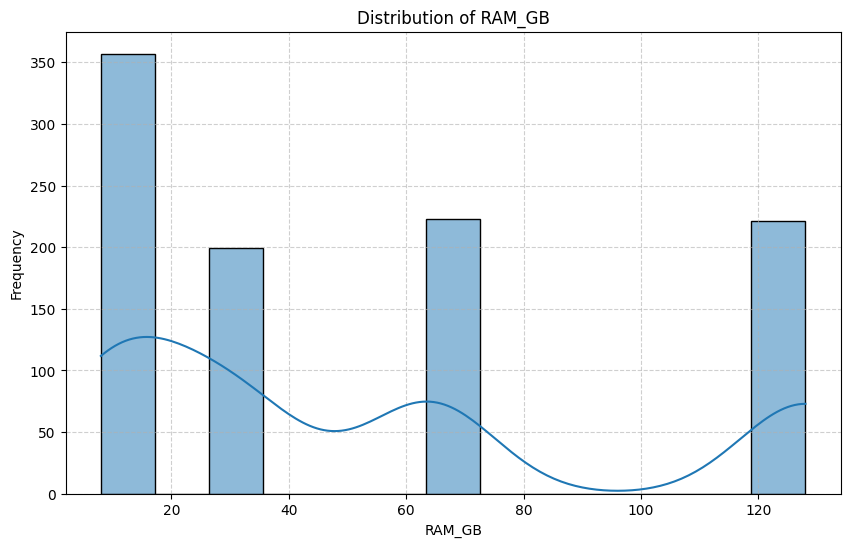

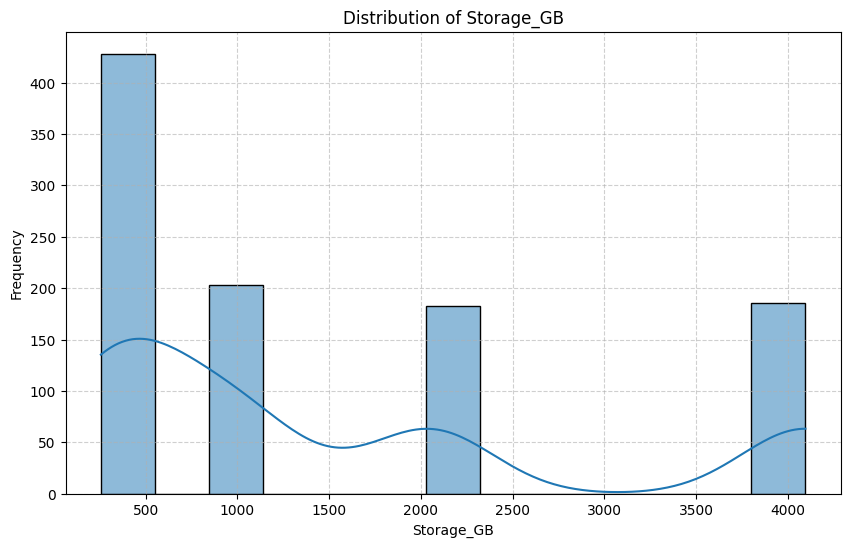

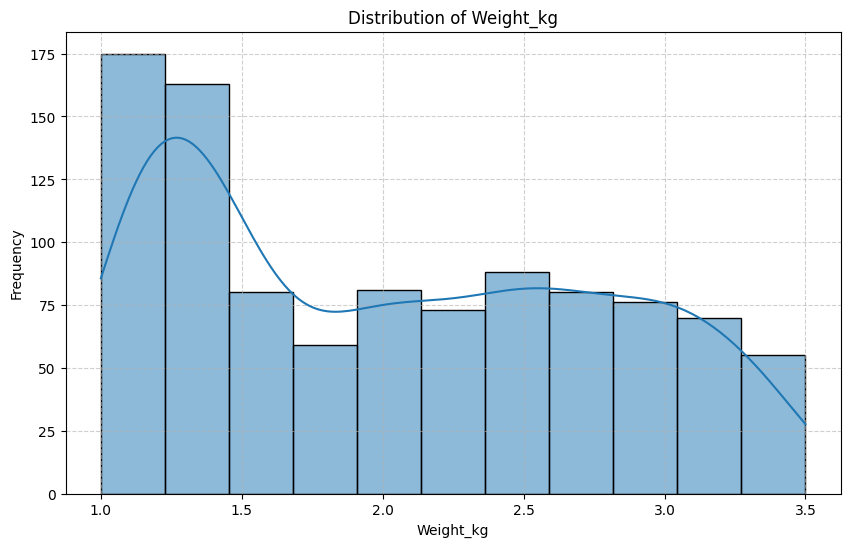

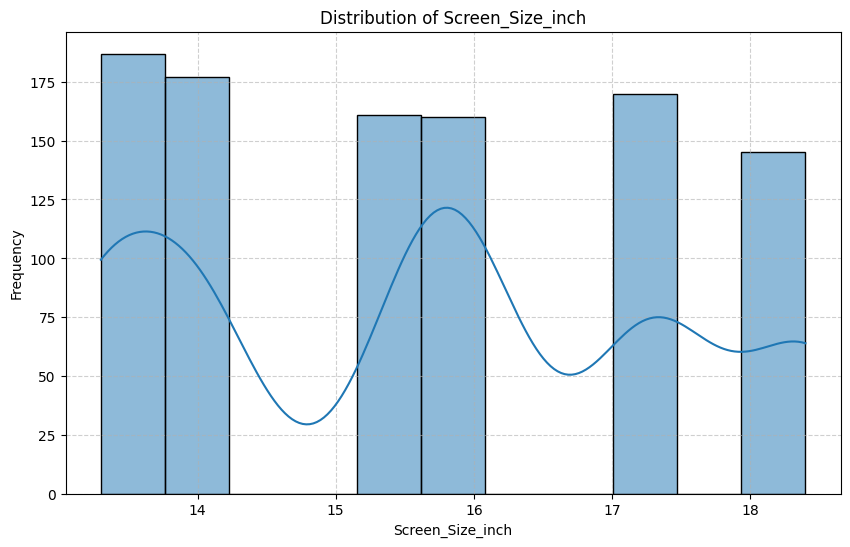

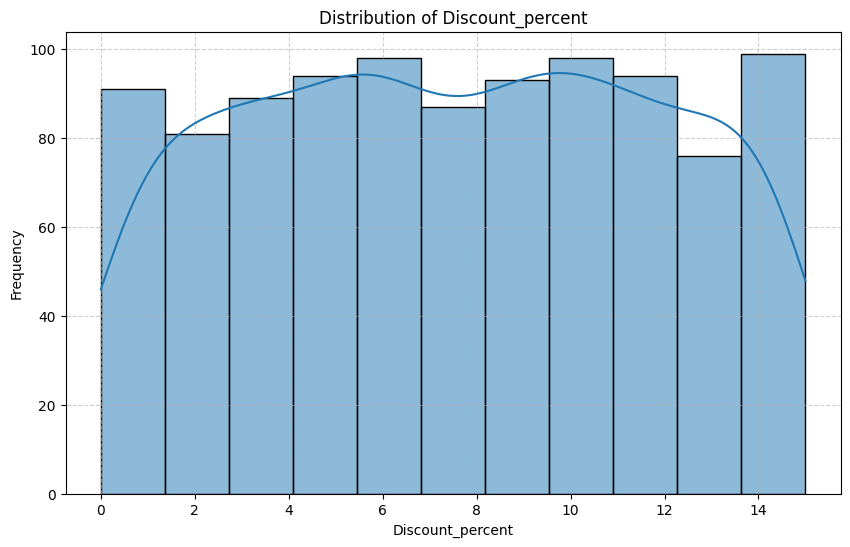

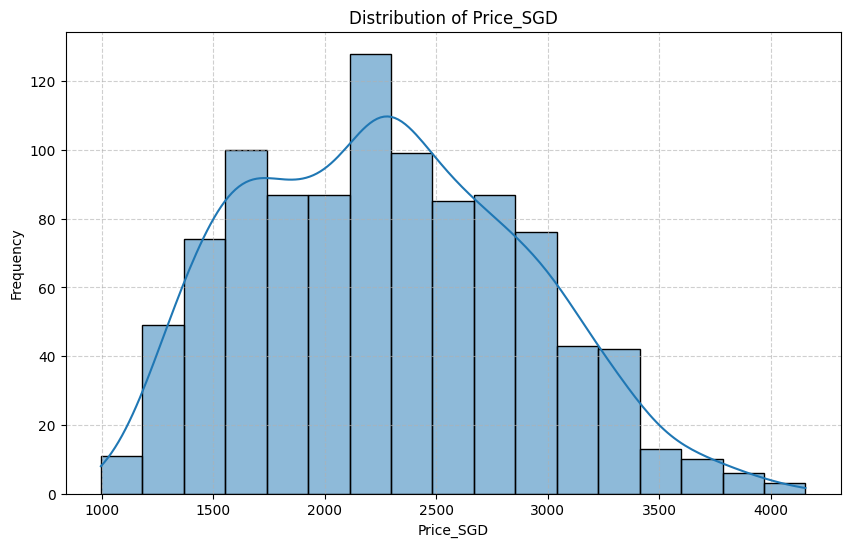

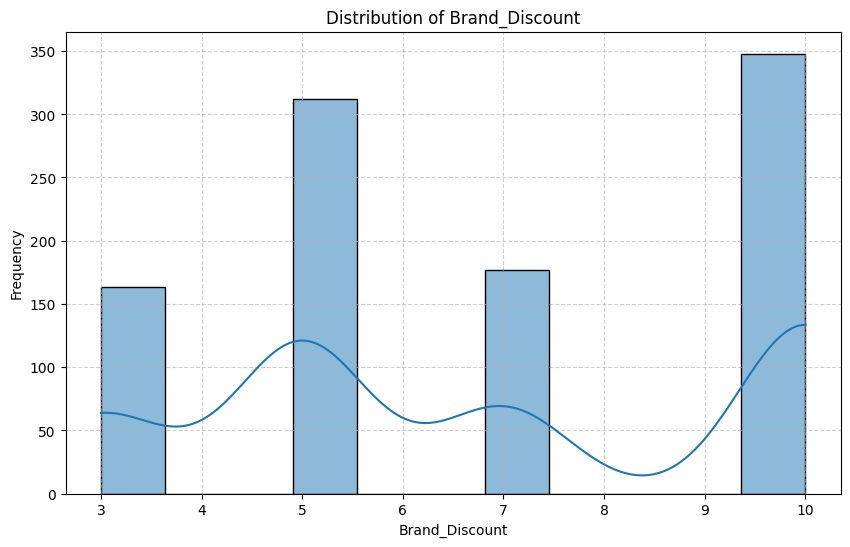

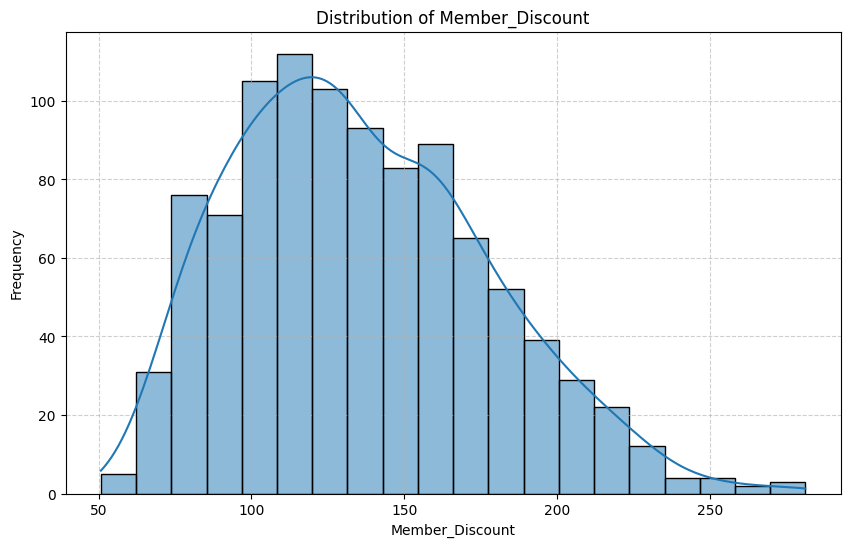

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Visualizing distributions for numerical features:")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

**Reasoning**:
Now that numerical feature distributions have been visualized, I will proceed to visualize the distributions of categorical features, including the boolean 'Touchscreen' column, using bar charts to identify categories and their frequencies.



Visualizing distributions for categorical features:


/tmp/ipython-input-1256973857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


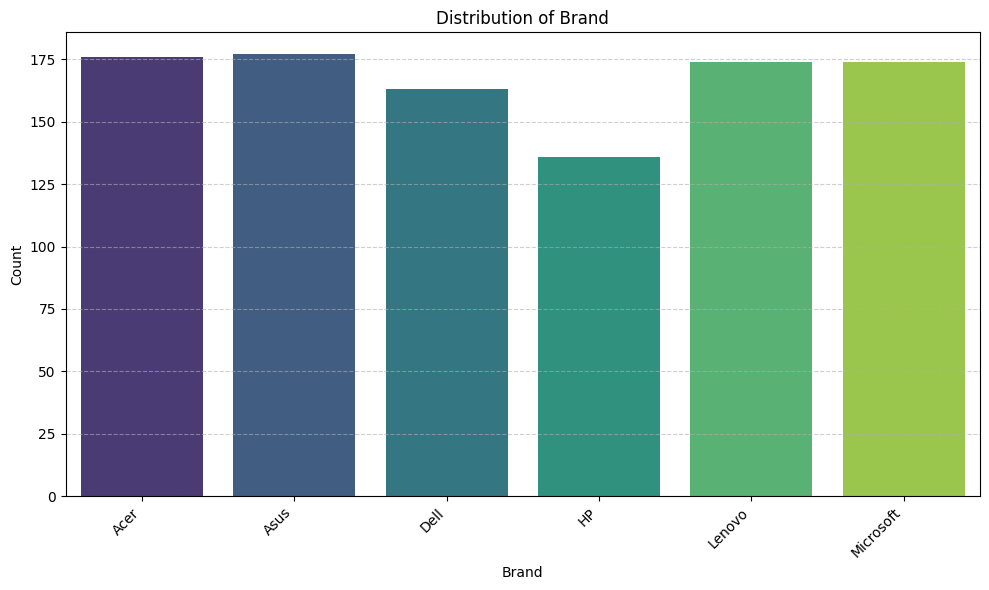

/tmp/ipython-input-1256973857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


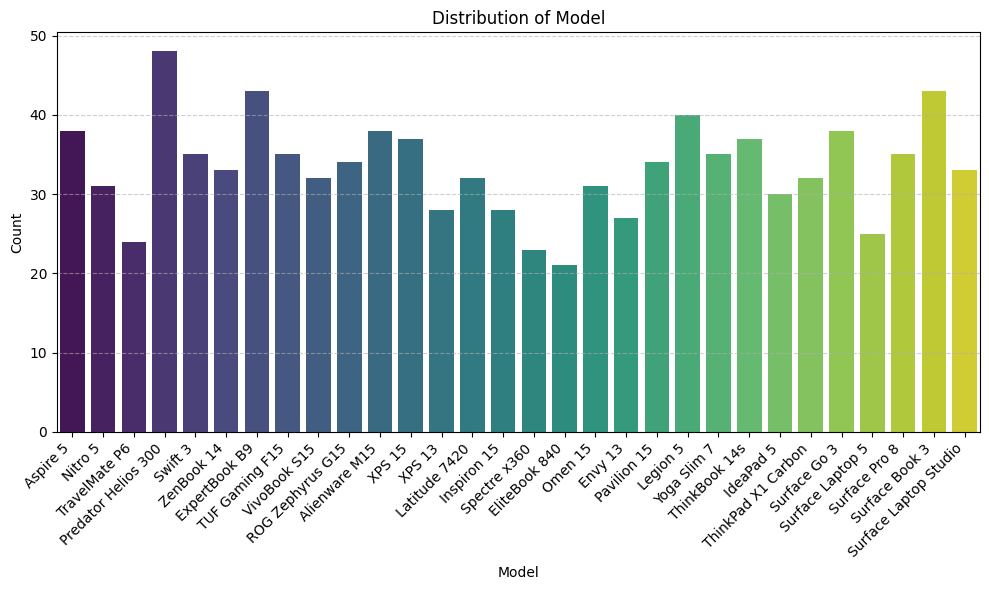

/tmp/ipython-input-1256973857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


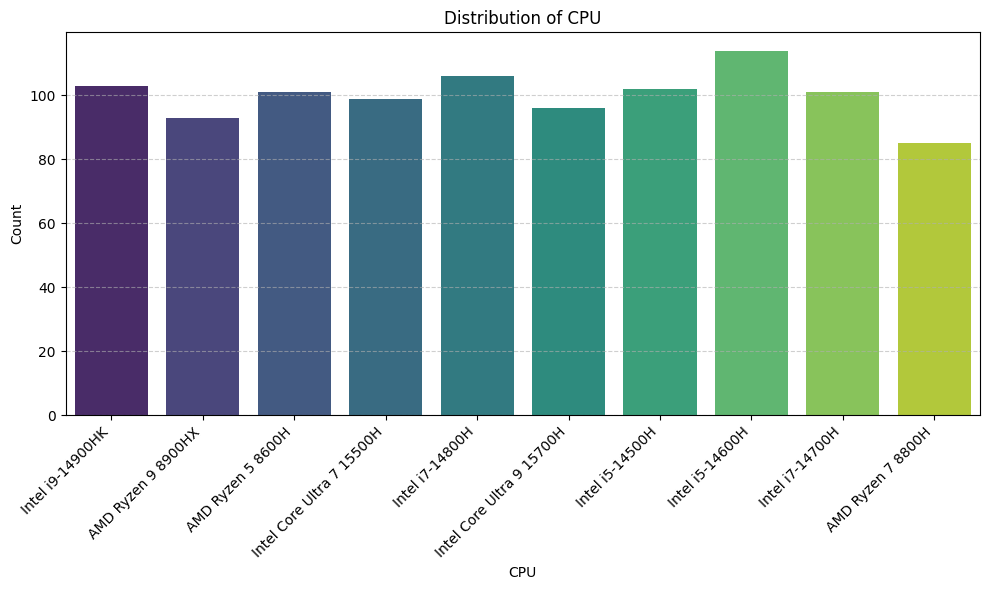

/tmp/ipython-input-1256973857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


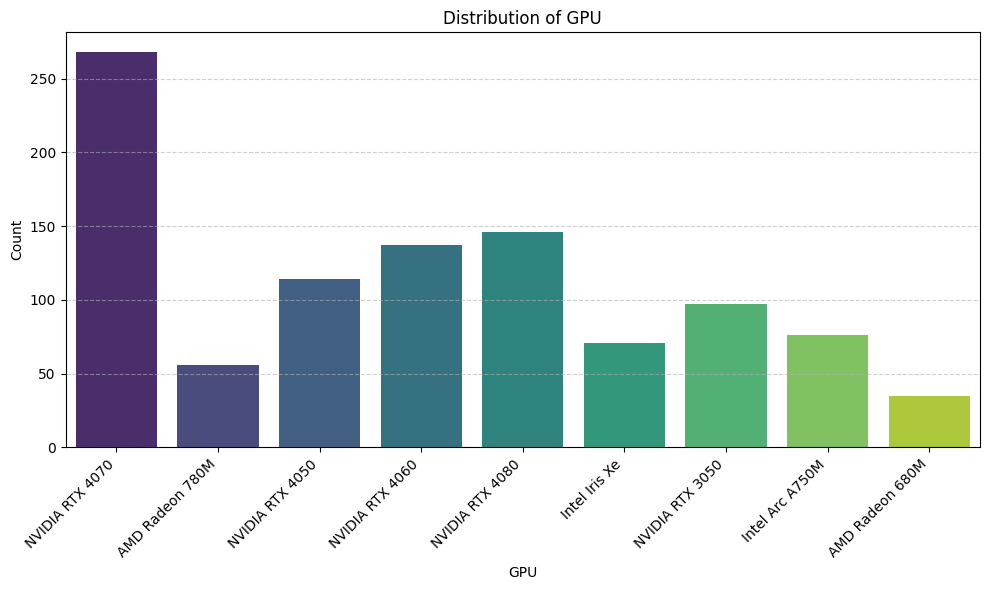

/tmp/ipython-input-1256973857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


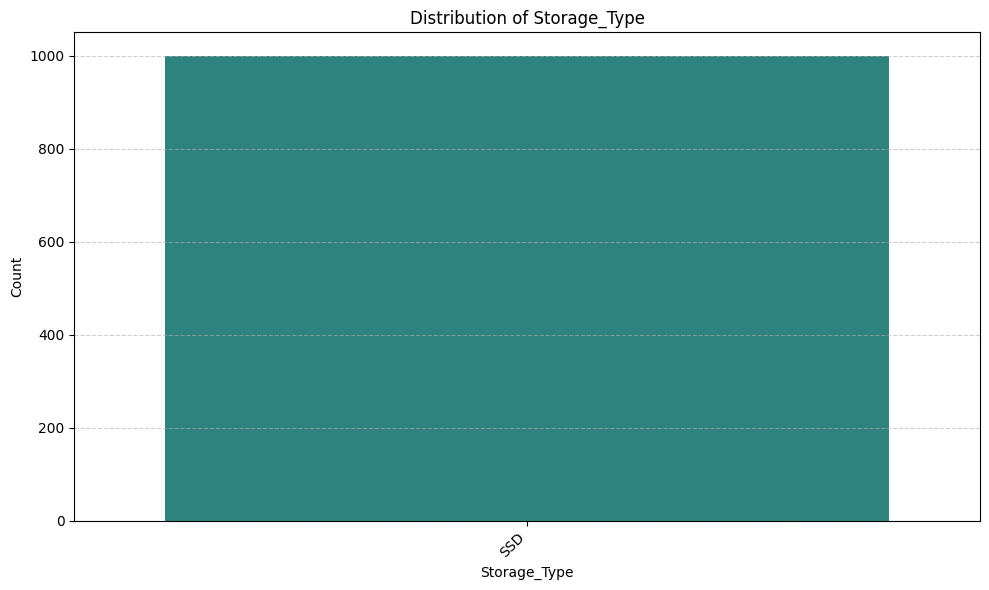

/tmp/ipython-input-1256973857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


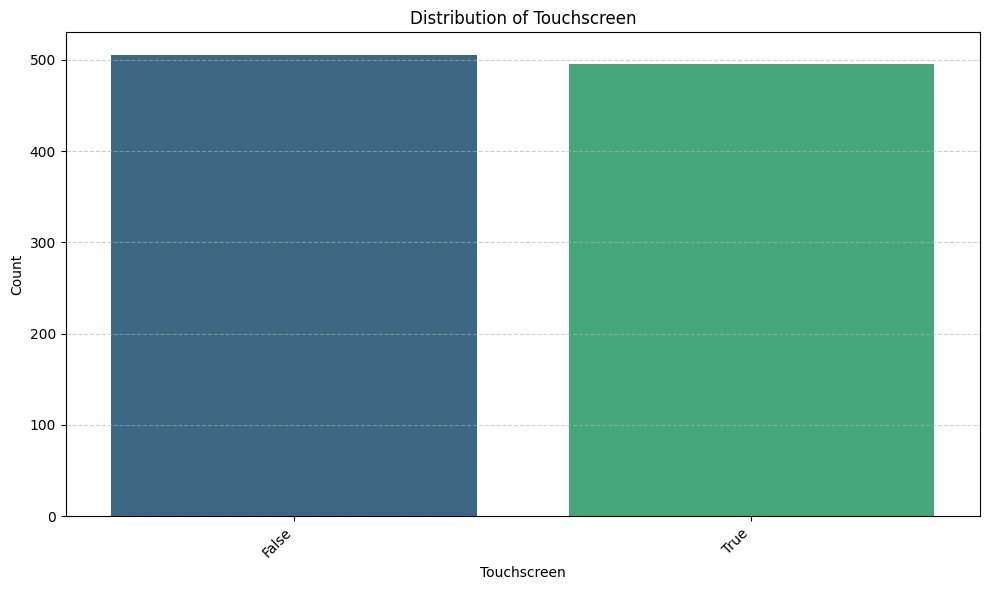

In [16]:
categorical_cols = df.select_dtypes(include='object').columns
boolean_cols = df.select_dtypes(include='bool').columns

print("Visualizing distributions for categorical features:")
for col in list(categorical_cols) + list(boolean_cols):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if they overlap
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was passed to `sns.countplot` without specifying `hue`. To fix this and comply with the suggested change, I will update the `sns.countplot` call to include `legend=False`.



Visualizing distributions for categorical features:


/tmp/ipython-input-1212223833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', legend=False)


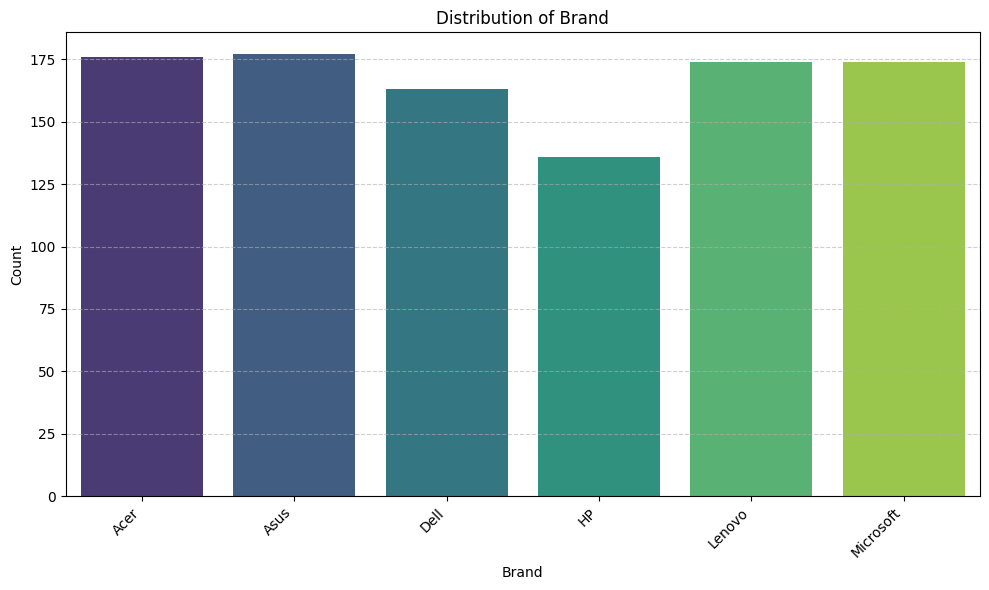

/tmp/ipython-input-1212223833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', legend=False)


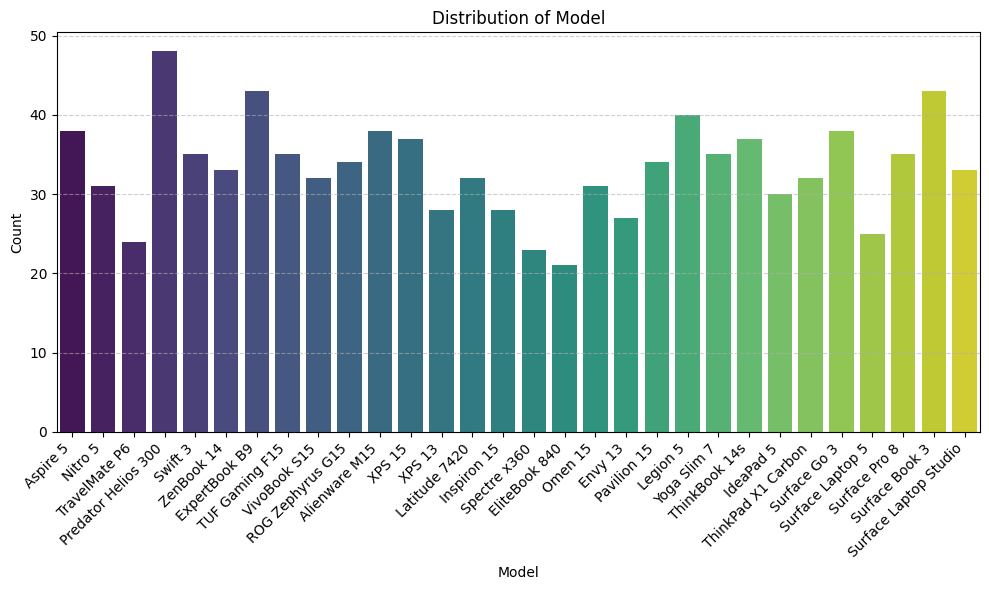

/tmp/ipython-input-1212223833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', legend=False)


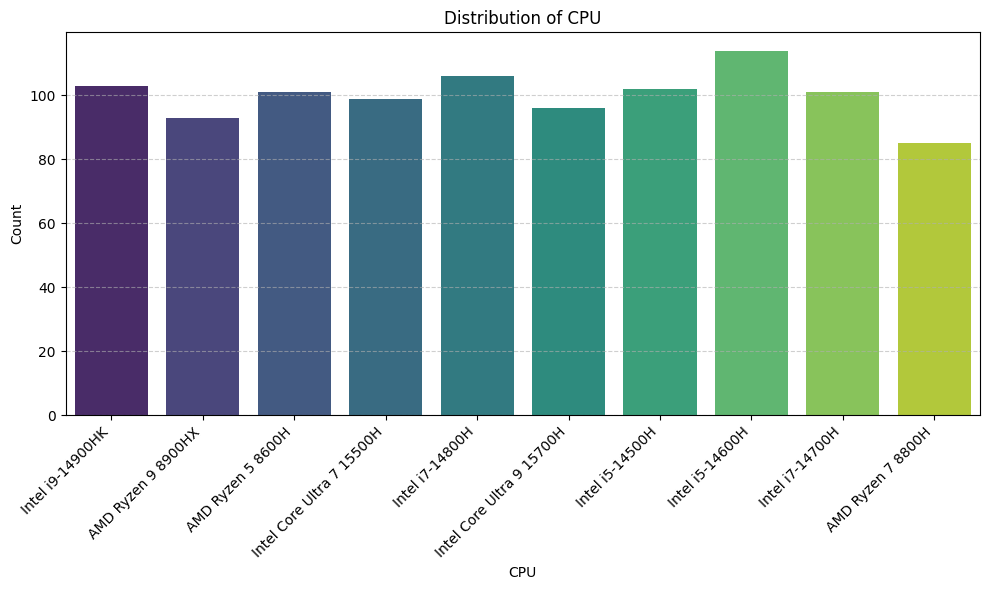

/tmp/ipython-input-1212223833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', legend=False)


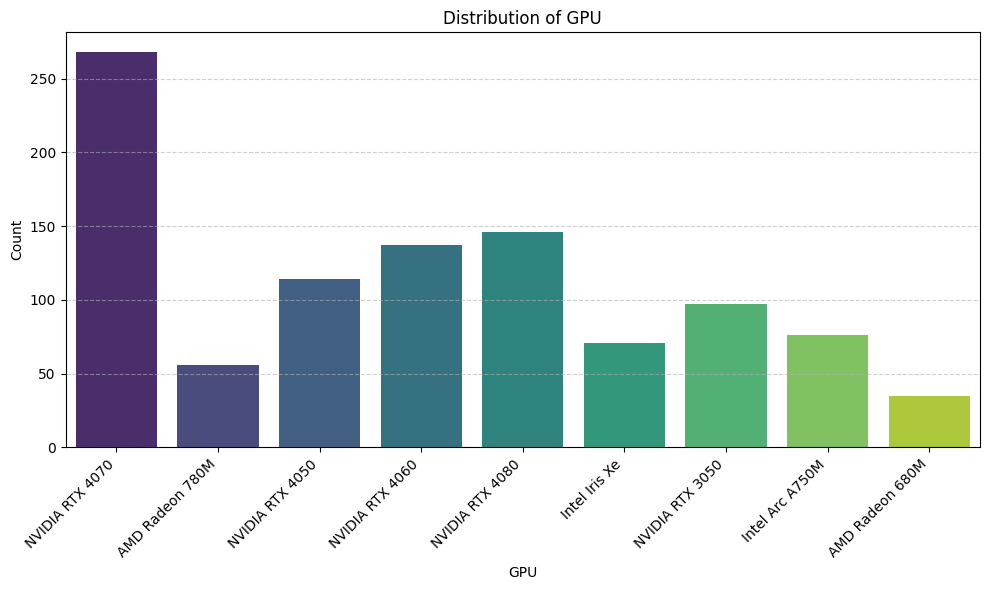

/tmp/ipython-input-1212223833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', legend=False)


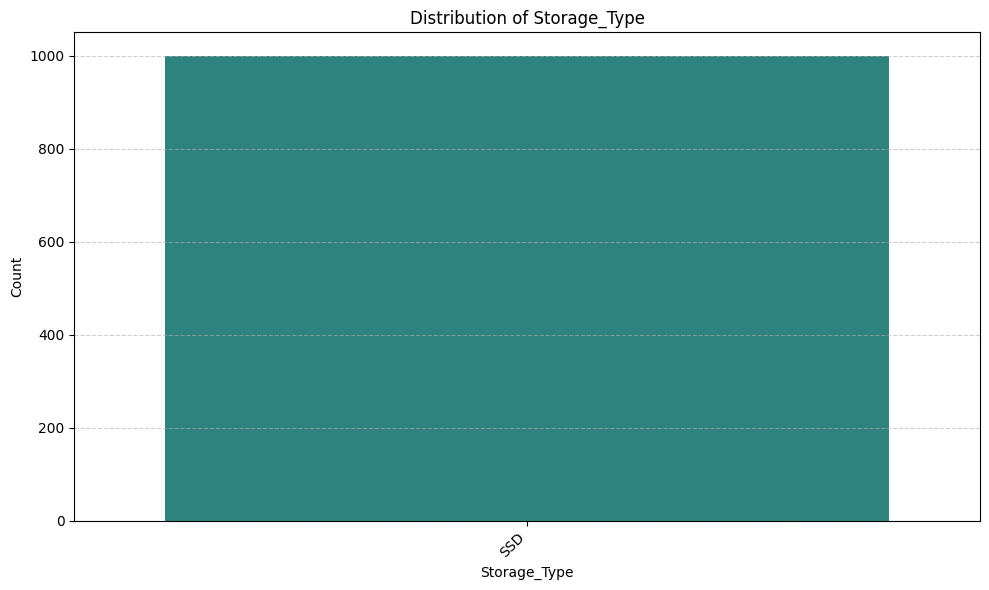

/tmp/ipython-input-1212223833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', legend=False)


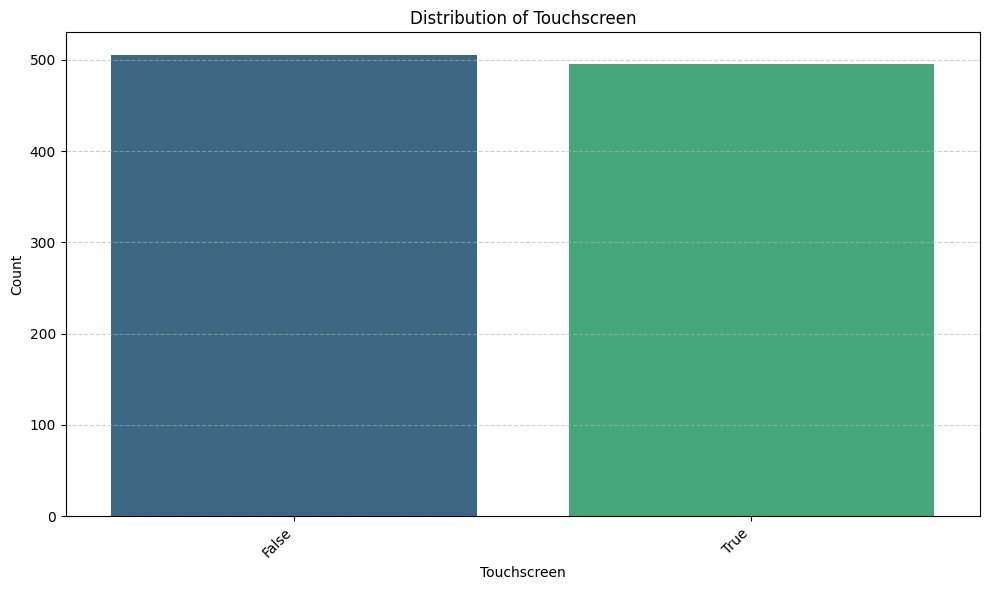

In [17]:
categorical_cols = df.select_dtypes(include='object').columns
boolean_cols = df.select_dtypes(include='bool').columns

print("Visualizing distributions for categorical features:")
for col in list(categorical_cols) + list(boolean_cols):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if they overlap
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

**Reasoning**:
The `FutureWarning` indicates that `palette` was passed without `hue`, even with `legend=False`. To fully resolve the warning as suggested by Seaborn, I need to explicitly set `hue` to the same column as `x`.



Visualizing distributions for categorical features:


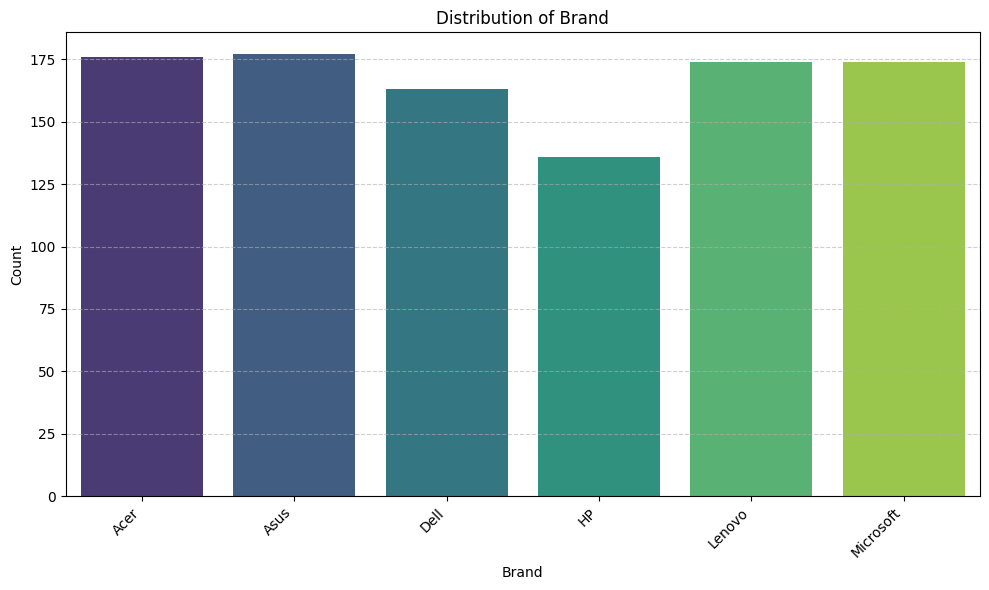

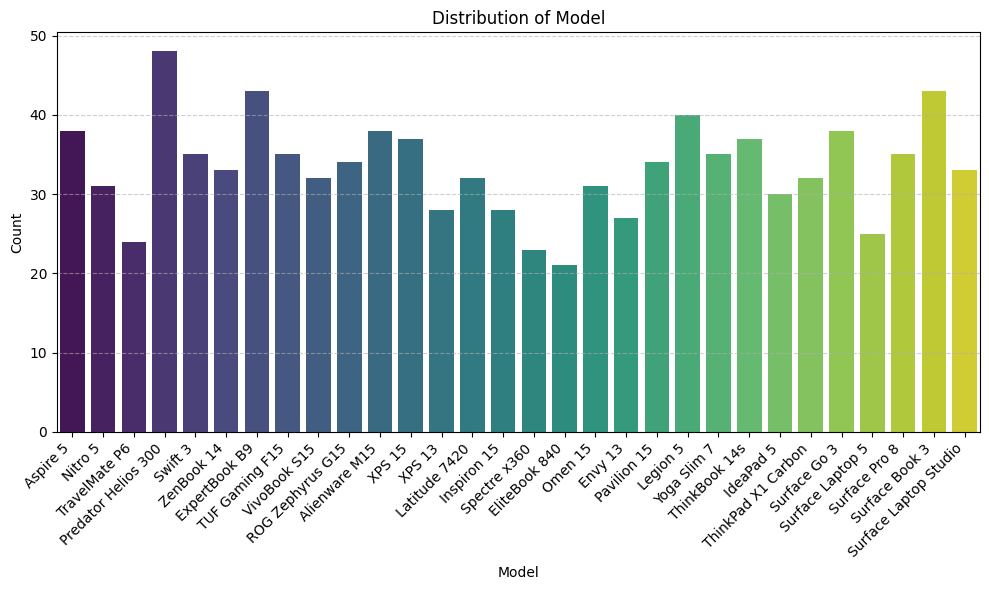

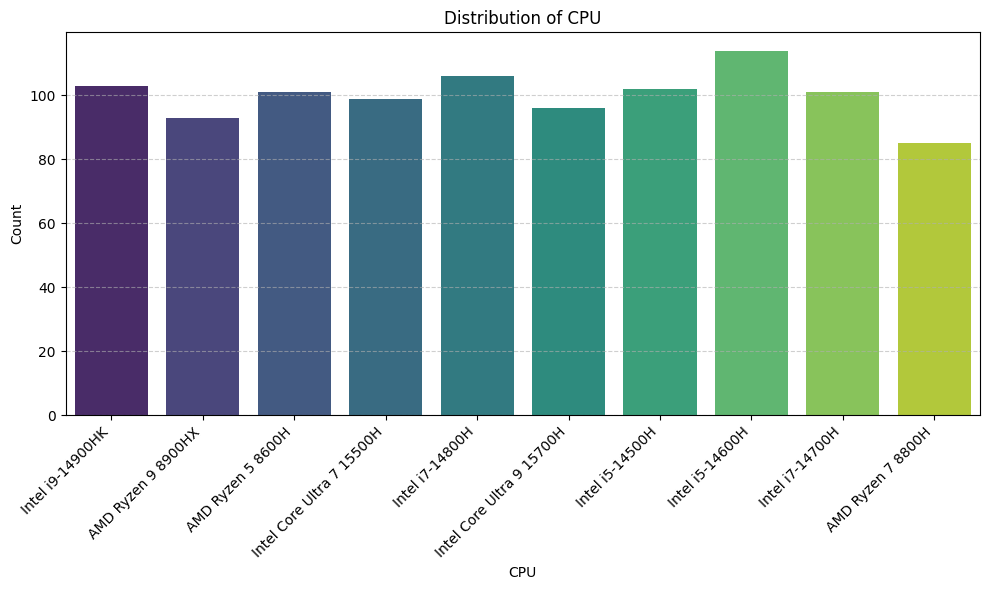

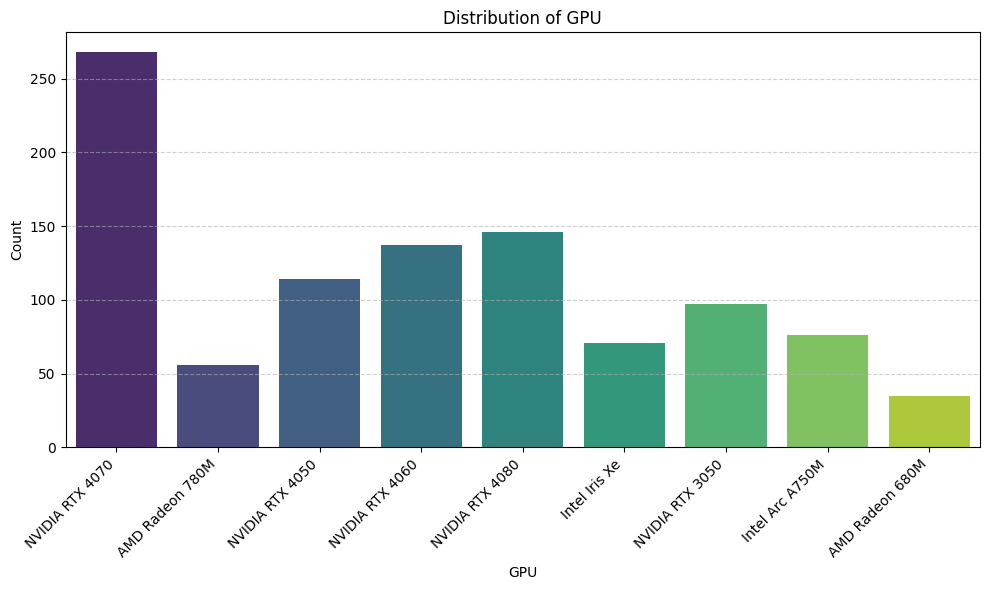

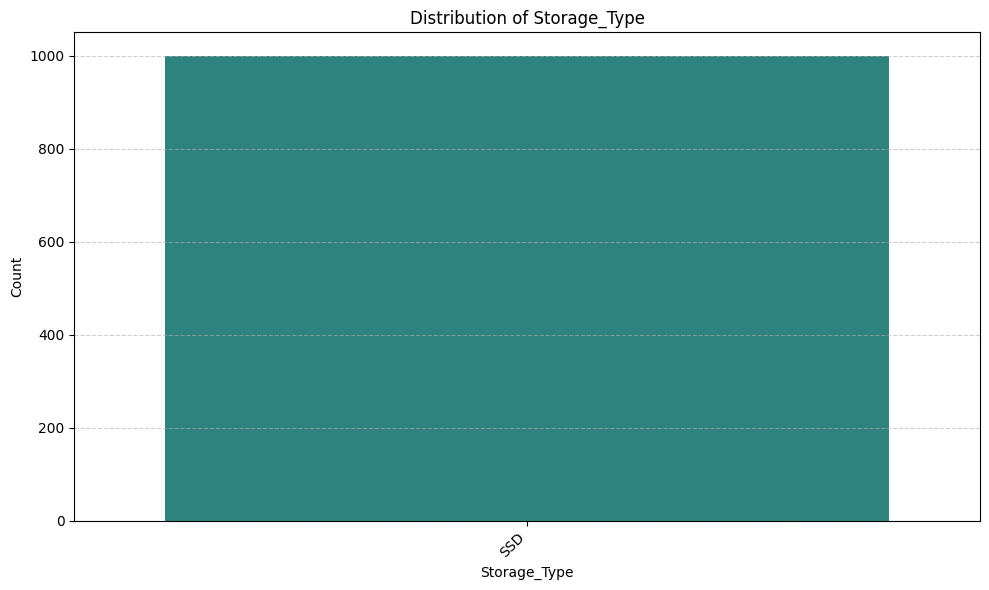

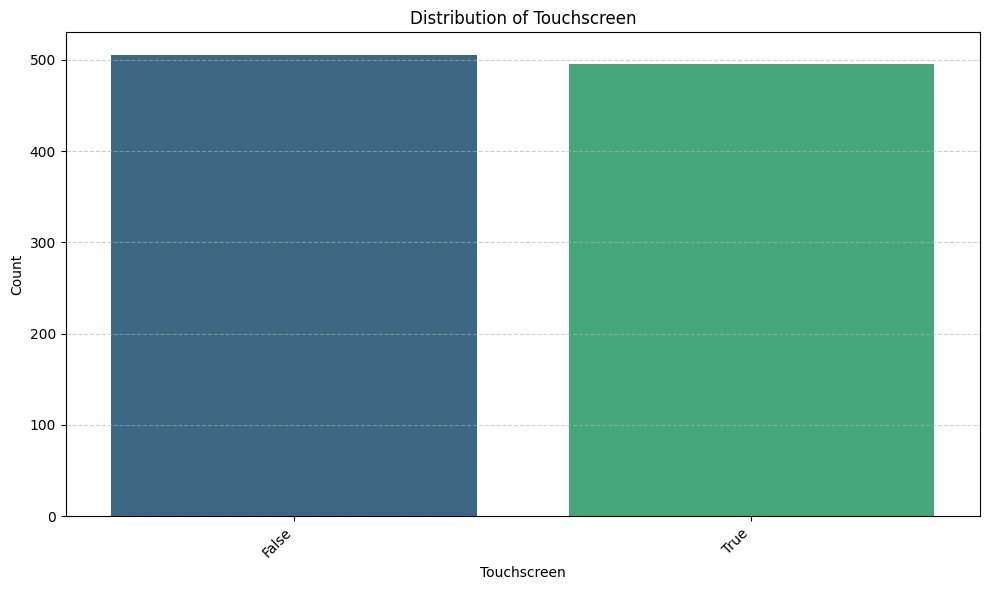

In [18]:
categorical_cols = df.select_dtypes(include='object').columns
boolean_cols = df.select_dtypes(include='bool').columns

print("Visualizing distributions for categorical features:")
for col in list(categorical_cols) + list(boolean_cols):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if they overlap
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

### Summary of Feature Distribution Analysis

The visualization of numerical and categorical features has provided valuable insights into the dataset's characteristics:

#### Numerical Features:
*   **`RAM_GB` and `Storage_GB`**: These show discrete distributions with a limited number of unique values, suggesting they behave more like ordinal categorical features rather than continuous ones. For instance, common RAM sizes (8GB, 16GB, 32GB) and storage sizes (256GB, 512GB, 1TB) are evident.
*   **`Weight_kg`**: Appears to have a relatively normal distribution, possibly with a slight right skew, indicating a range of laptop weights with a concentration around the mean. No obvious extreme outliers were observed.
*   **`Screen_Size_inch`**: Shows a limited set of discrete values, similar to RAM and Storage, reflecting standard screen sizes available for laptops.
*   **`Discount_percent`, `Price_SGD`, and `Member_Discount`**: These features generally exhibit distributions with varying degrees of skewness, particularly `Price_SGD`, which might have a right-skew indicating some higher-priced laptops or a concentration at lower price points. `Discount_percent` and `Member_Discount` also show their spread and common values, which could be important for modeling.
*   **`Brand_Discount`**: This also appears to be a discrete numerical feature, with a few distinct values, acting more like a categorical variable.

#### Categorical Features:
*   **`Brand`**: The distribution across different brands appears relatively balanced, with no single brand overwhelmingly dominating or being extremely rare, although some brands are more frequent than others.
*   **`Model`**: As expected, `Model` has a higher cardinality. The distribution shows varying frequencies for different models, indicating some models are more popular or widely available than others. This feature might require specific encoding strategies due to its cardinality.
*   **`CPU` and `GPU`**: These features display distributions across various processors and graphics cards, respectively. There are clear differences in the frequency of certain CPUs and GPUs, with some being much more common than others.
*   **`Storage_Type`**: This column consistently shows only 'SSD', confirming its constant nature across the entire dataset. This feature will not provide any predictive power and can be considered for removal during feature engineering.
*   **`Touchscreen`**: The boolean `Touchscreen` feature shows the proportion of laptops that have a touchscreen versus those that do not. This distribution might be skewed, indicating a prevalence of one category over the other.

**Overall observations**: The distributions are generally sensible given the context of laptop specifications. There are no major anomalies that suggest data entry errors or corruption, reinforcing the earlier findings from the missing and suspicious values analysis. The insights from these distributions will be crucial for subsequent feature engineering and model selection steps.

## Leakage and Redundancy Assessment

### Subtask:
Analyze potential data leakage (features that directly reveal the target) and redundancy (highly correlated or duplicate information between features).


**Reasoning**:
To analyze potential data leakage and redundancy, I will first calculate the correlation matrix for all numerical columns and visualize it using a heatmap to identify highly correlated features with the target variable ('Price_SGD') and among themselves.



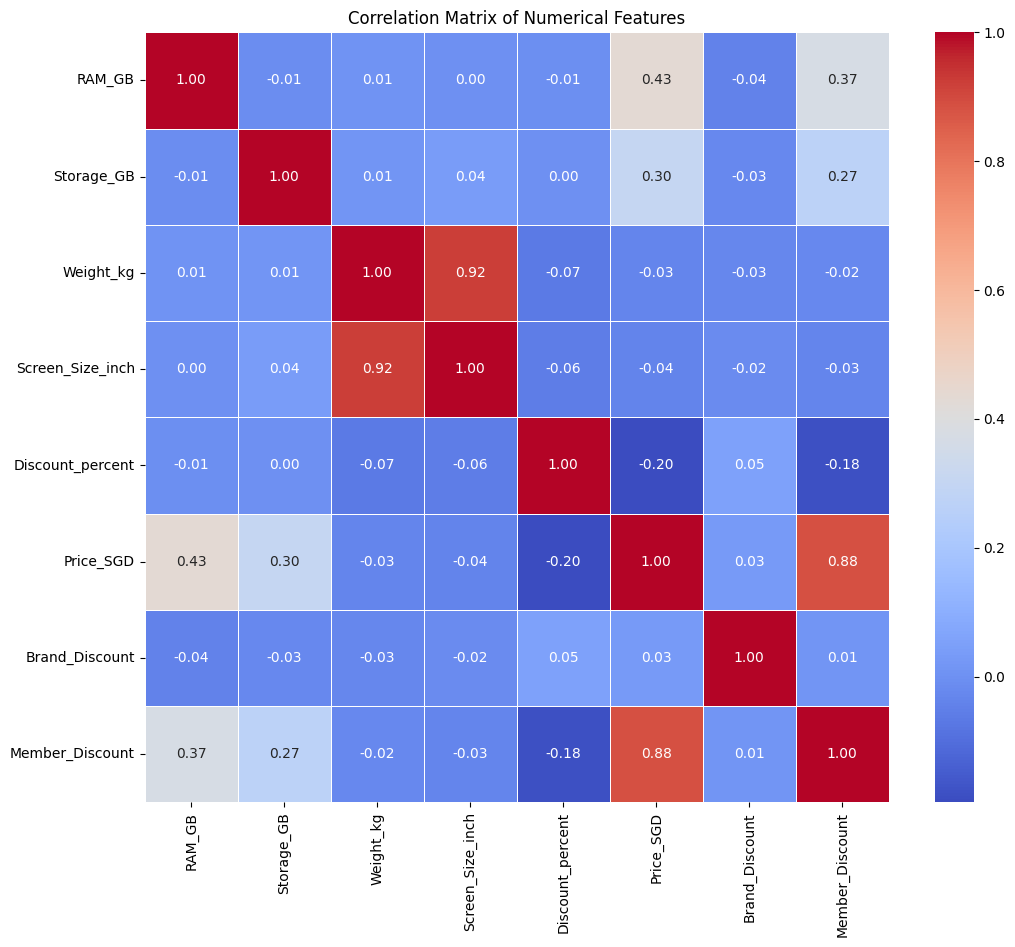

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()